# IS4303 IT-MEDIATED FINANCIAL SOLUTIONS AND PLATFORMS

> ## Week 6 Tutorial - Hyperparameter Tuning and Ensemble Learning Methods

<div class="alert alert-danger">
<b>Python Version:</b> 2.7+<br>Create a virtual environment in Anaconda if needed.
</div>

## Sections:
* [0. Goal](#0)
* [1. Dataset](#1)
* [2. Data Preprocessing](#2)
* [3. Hyperparameter Tuning](#3)
* [4. Ensemble Learning](#4)

## Summary of Ensemble Learning

<div class="alert alert-success">
<b>Resources:</b> 
<a href="https://en.wikipedia.org/wiki/Ensemble_learning" target="_blank" style="text-decoration: none"><span class="label label-info">Wikipedia</span></a>
<a href="https://youtu.be/PGITM1E2CLk" target="_blank" style="text-decoration: none"><span class="label label-warning">Youtube</span></a>
<a href="https://scikit-learn.org/stable/modules/ensemble.html" target="_blank" style="text-decoration: none"><span class="label label-danger">Scikit-learn</span></a>
</div>

In [1]:
# You can also watch this youtube video in this notebook
from IPython.display import HTML, IFrame
IFrame(src="https://www.youtube.com/embed/PGITM1E2CLk", width="550", height="400")

***

<a id="0"></a>

## 0 Goal

#### The goal of this tutorial is to understand: 
* Hyperparameter Tuning
* Decision Tree 
* Ensemble Learning Methods 

<a id="1"></a>

## 1 Dataset

<br><div class="btn-group"> 
    <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Introduction</a>
    <a href="#overview" class="btn btn-success" role="button" style="text-decoration: none">Overview</a>
    <a href="#task" class="btn btn-warning" role="button" style="text-decoration: none">Tasks</a>
</div>

<a id="overview"></a>
#### Overview
The file <b><code>"default of credit card clients.xls"</code></b> contains information about customers' default payments. <br>

The dataset can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/). Information on the columns and features can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). <br>

**Output variable** is binary, default payment (Yes = 1, No = 0). We have the following 23 variables as **explanatory variables**: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

<a id="task"></a>
#### Tasks: Hyperparameter Optimization and Ensemble Learning
* Understand the general procedure of hyperparameter tuning
* Estimate and predict credit default behavior using various decision tree and ensemble methods
* Evaluate model performance using different performance metrics

<a id="2"></a> 

## 2 Data Preprocessing

In [2]:
#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from functools import reduce
from collections import defaultdict
from IPython.display import HTML
%matplotlib inline

<div class="alert alert-warning">
<b>Step 2.1: Read data into python pandas and named as "default".</b><br><br>
    
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Read Excel</a>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Read CSV</a>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/io.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Read Others</a>
</div><br>

<div class="alert alert-danger">
<b>Note:</b> 
<ol>
    <li>The type of your file?</li>
    <li>Why do we set <code>header=1</code>?</li>
    <li>If you encounter error message, you may need to install or upgrade <code>xlrd</code> package in advance.</li>
</ol>
</div>    
</div>

In [3]:
%pwd
default = pd.read_excel("./default of credit card clients.xls", header=1)
default.drop(['ID', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], inplace=True, axis=1)

In [4]:
default.head(n=10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
print("The dimension of this data: ", default.shape)

The dimension of this data:  (30000, 18)


In [6]:
print("The variable names of this data: ", "\n", default.columns)

The variable names of this data:  
 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [7]:
# Are they all numerical variables?
print("Type of variables: ", "\n", default.dtypes)

Type of variables:  
 LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


<div class="alert alert-warning">
<b>Step 2.2: Rename dependent/response variable.</b>
<br><br>    
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Rename</a>
</div>
</div>

In [8]:
default = default.rename(columns={'default payment next month': 'default'})
default.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default'],
      dtype='object')

<div class="alert alert-warning">
<b>Step 2.3: Detect missing values. If there are not many missing values, you can simply delete them. If not, you can (1) delete missing values, (2) do data imputation, or (3) drop features.</b>
<br><br>
<div class="btn-group">    
    <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">Missing Data</a>
</div>
</div>

In [9]:
# The proportion of missing values for each variable
default.isnull().sum()/len(default)

LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
default      0.0
dtype: float64

In [10]:
# Luckily, we do not have missing values in this example. But suppose we have some, we can delete missing values
default.dropna(inplace=True)
default.shape

(30000, 18)

In [11]:
# Or we can impute with substituted values (e.g., mean values)
# Suppose there are some missing values in variable "LIMIT_BAL"
default['LIMIT_BAL'].fillna(default['LIMIT_BAL'].mean(), inplace=True)
default.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


<div class="alert alert-warning">
<b>Step 2.4: Binarize categorical variables.</b>
<br><br>
<div class="btn-group">    
    <a href="https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">One-hot Encoding</a>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">get_dummies</a>
</div>
    
<div class="alert alert-danger">
<b>Note: </b><p>If one categorical variable has <code>N</code> unique values, you adopt <code>one-hot encoding</code> and create <code>N</code> dummy variables, but you only need to include <code>N-1</code> of them. Think about why.</p>
</div>
</div>

In [12]:
# ['SEX', 'EDUCATION', 'MARRIAGE'] are categorical variables, so we need to binarize them by one-hot encoding
categorical_feature_list = ['SEX', 'EDUCATION', 'MARRIAGE']
default[categorical_feature_list] = default[categorical_feature_list].applymap(str)
default.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [13]:
# Number of unique values
default[categorical_feature_list].nunique()

SEX          2
EDUCATION    7
MARRIAGE     4
dtype: int64

In [14]:
# What are these unique values
for name in categorical_feature_list:
    print(name, '\n', default[name].value_counts(), '\n')

SEX 
 2    18112
1    11888
Name: SEX, dtype: int64 

EDUCATION 
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

MARRIAGE 
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 



In [15]:
dummies = pd.get_dummies(default[categorical_feature_list], drop_first=True) # dummy variables
dummies.head(10)

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,1,0
7,1,0,1,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,0,0,0,1,0


In [16]:
# Merge dummies with original dataset, and drop original categorical variables
default_data = default.join(dummies)
default_data.drop(categorical_feature_list, axis=1, inplace=True)
default_data.head(10)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,1,0,0,0,0,1,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,1,0,1,0,0,0,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,1,0,1,0,0,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,1,0,1,0,0,0,0,1,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,1,0,0
5,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,...,0,1,0,0,0,0,0,0,1,0
6,500000,29,367965,412023,445007,542653,483003,473944,55000,40000,...,0,1,0,0,0,0,0,0,1,0
7,100000,23,11876,380,601,221,-159,567,380,601,...,1,0,1,0,0,0,0,0,1,0
8,140000,28,11285,14096,12108,12211,11793,3719,3329,0,...,1,0,0,1,0,0,0,1,0,0
9,20000,35,0,0,0,0,13007,13912,0,0,...,0,0,0,1,0,0,0,0,1,0


<div class="alert alert-warning">
<b>Step 2.5: Report correlations between these variables.</b>
<br><br>
<div class="btn-group">    
    <a href="https://en.wikipedia.org/wiki/Correlation_and_dependence" target="_blank" class="btn btn-info" role="button" style="text-decoration: none">What is Correlation</a>
</div>
</div>

In [17]:
correlation = default.corr()
correlation

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,-0.014076
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,-0.010156
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184,-0.006760
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494,-0.005372
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579


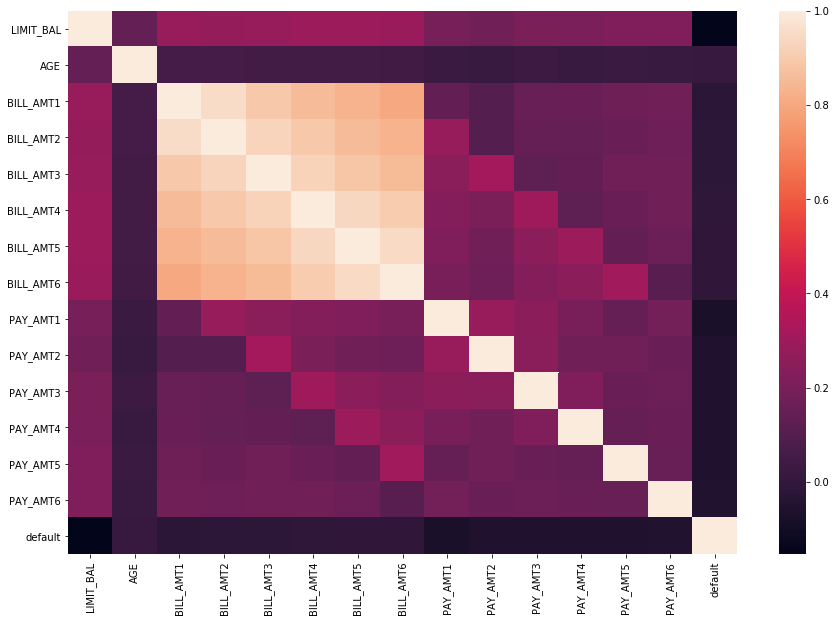

In [18]:
# You can also use "seaborn" package to plot heatmap
# Remember to install seaborn in advance
import seaborn as sns
plt.figure(figsize=(15, 10))
ax = sns.heatmap(correlation)

<div class="alert alert-warning">
<b>Step 2.6: Report summary statistics of variables.</b>
</div>

In [19]:
default_data.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,...,0.603733,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.455300,0.532133,0.010767
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,...,0.489129,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.498006,0.498975,0.103204
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class="alert alert-warning">
<b>Step 2.7: Split data into features X and output y.</b>
</div>

In [20]:
output = 'default'
X = default_data.drop(output, axis=1) # Here no need to set inplace=True
y = default_data[output]

<div class="alert alert-warning">
<b>Step 2.8: Univariate distribution of output y.</b>
</div>

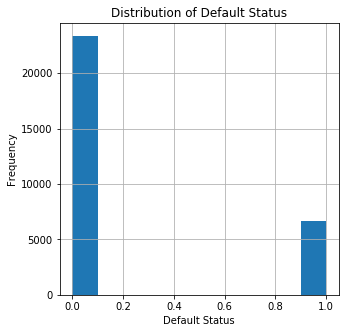

In [21]:
# Distribution of safe and risky loans
plt.figure(figsize=(5,5))
y.hist()
plt.xlabel('Default Status')
plt.ylabel('Frequency')
plt.title('Distribution of Default Status')
plt.show()

<a id="3"></a>

## 3 Hyperparameter Tuning
### —— A Case of Lasso Model with L1-Penalty

In [22]:
# Import libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [23]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=12345)
print(y_train.sum()/y_train.count(),y_test.sum()/y_test.count())

0.22311111111111112 0.22038095238095237


<div class="alert alert-warning">
<b>Step 3.1: Initialize a Logistic Regression with L1-Penalty.</b>
</div>

In [24]:
lasso = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear', tol=0.01, random_state=12345)

<div class="alert alert-warning">
<b>Step 3.2: Hyperparameter Tuning on Regularization Strength.</b> 
<p>Find the best $\lambda$ in terms of, for example, highest accuracy. Plot the relationship between regularization strength $\lambda$ and lasso coefficients' size.</p>
<div><b>Remember: </b>
<ol>    
<li>Create 1000 regularization strength paramaters $\lambda$. For example: <code>np.logspace(-9, 9, 1000)</code>.</li>
</ol>
</div>
</div>

In [25]:
# Create N regularization strength paramaters: lambdas
N = 1000
lbd = np.logspace(-9, 9, N)
lbd

array([1.00000000e-09, 1.04236067e-09, 1.08651577e-09, 1.13254132e-09,
       1.18051653e-09, 1.23052400e-09, 1.28264983e-09, 1.33698374e-09,
       1.39361927e-09, 1.45265393e-09, 1.51418933e-09, 1.57833141e-09,
       1.64519059e-09, 1.71488197e-09, 1.78752553e-09, 1.86324631e-09,
       1.94217468e-09, 2.02444651e-09, 2.11020343e-09, 2.19959307e-09,
       2.29276931e-09, 2.38989257e-09, 2.49113003e-09, 2.59665597e-09,
       2.70665207e-09, 2.82130768e-09, 2.94082017e-09, 3.06539530e-09,
       3.19524751e-09, 3.33060034e-09, 3.47168682e-09, 3.61874981e-09,
       3.77204249e-09, 3.93182876e-09, 4.09838367e-09, 4.27199397e-09,
       4.45295851e-09, 4.64158883e-09, 4.83820966e-09, 5.04315949e-09,
       5.25679112e-09, 5.47947234e-09, 5.71158648e-09, 5.95353313e-09,
       6.20572881e-09, 6.46860766e-09, 6.74262224e-09, 7.02824426e-09,
       7.32596543e-09, 7.63629826e-09, 7.95977700e-09, 8.29695852e-09,
       8.64842328e-09, 9.01477631e-09, 9.39664831e-09, 9.79469667e-09,
      

In [26]:
coefs = [] # Coefficients for different lambda
lasso_max_accuracy = 0
lasso_best_lambda = 0
lasso_best_coefficient = np.array([])

# Train the model with different regularization strengths
for a in lbd:
    lasso.set_params(C=1/a) # Note that C is inverse value of regularization strength parameter "lambda"
    lasso_model = lasso.fit(X_train, y_train) # Fit Lasso model   
    y_pred = lasso_model.predict(X_test) # Prediction
    accuracy = accuracy_score(y_test, y_pred) # Test accuracy   
    coefs.append(lasso_model.coef_[0]) # Store coefficients for this lambda
    
    # Find the best lambda
    if accuracy >= lasso_max_accuracy:
        lasso_max_accuracy = accuracy
        lasso_best_lambda = a
        lasso_best_coefficient = lasso_model.coef_[0]
    
    
coefs_array = np.array(coefs) # Transform list to numpy array
print(coefs_array)

[[-2.84331215e-06  1.35847473e-03 -7.55238747e-06 ... -3.31414162e-01
  -5.41038380e-01 -2.16667949e-01]
 [-2.84331215e-06  1.35847473e-03 -7.55238747e-06 ... -3.31414162e-01
  -5.41038380e-01 -2.16667949e-01]
 [-2.84331215e-06  1.35847473e-03 -7.55238747e-06 ... -3.31414162e-01
  -5.41038380e-01 -2.16667949e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [27]:
print("Best lambda is {} and highest test accuracy is {}.".format(lasso_best_lambda, lasso_max_accuracy))
print("Lasso coefficients of the best lambda are: \n {}".format(lasso_best_coefficient))

Best lambda is 1230.5240043592617 and highest test accuracy is 0.7797619047619048.
Lasso coefficients of the best lambda are: 
 [-3.27825526e-06 -1.48195004e-02 -7.95458055e-06  1.77723142e-06
  1.03430854e-06  3.82259195e-06  1.67536361e-07  6.43285990e-06
 -1.56268629e-05 -2.77646693e-05 -1.20867907e-05 -4.55396376e-06
 -1.16617017e-05 -7.22559173e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


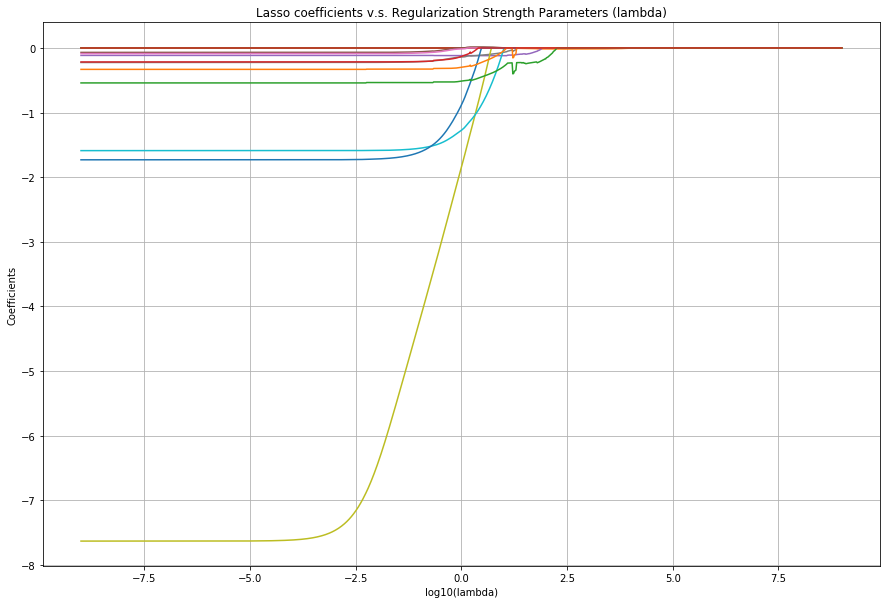

In [28]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(np.log10(lbd), coefs_array)
plt.xlabel('log10(lambda)')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients v.s. Regularization Strength Parameters (lambda)')
plt.axis('tight')
plt.show()

<div class="alert alert-danger">
<b>Findings:</b><p>As regularization strength parameter increases, coefficient size will quickly/suddenly drop to 0. We penalize more on large-size coefficients. That is how Lasso regression does feature selection (i.e., Embedded method).</p>
</div>

<div class="alert alert-warning">
<b>Step 3.3: Confusion Matrix, ROC and AUC</b> 
<p>You can refer to: </p>
<div class="btn-group"> 
    <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics" target="_blank" class="btn btn-success" role="button" style="text-decoration: none">Performance Metrics</a>
    <a href="https://matplotlib.org/users/pyplot_tutorial.html" target="_blank" class="btn btn-warning" role="button" style="text-decoration: none">Matplotlib</a>
</div>
</div>

In [29]:
# Fit the lasso model with this best lambda
lasso = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear', max_iter=1000, tol=0.01, C=1/lasso_best_lambda , random_state=12345)
lasso_model = lasso.fit(X_train, y_train)

# Get predicted labels for test data
y_pred_lasso = lasso_model.predict(X_test)

# Performance of model on test data: Confusion matrix
cm = confusion_matrix(y_test, y_pred_lasso)
tn, fp, fn, tp = cm.ravel()

print("Test Accuracy of Lasso Model: ", accuracy_score(y_test, y_pred_lasso))
print("Test Error of Lasso Model: ", 1 - accuracy_score(y_test, y_pred_lasso))
print("Confusion matrix of Lasso Model:\n", cm)
print("Sensitivity (True positive rate, or Recall) of Lasso Model: ", recall_score(y_test, y_pred_lasso))
print("Precision (Positive predictive value) of Lasso Model: ", precision_score(y_test, y_pred_lasso))

Test Accuracy of Lasso Model:  0.7797619047619048
Test Error of Lasso Model:  0.22023809523809523
Confusion matrix of Lasso Model:
 [[16372     0]
 [ 4625     3]]
Sensitivity (True positive rate, or Recall) of Lasso Model:  0.0006482281763180639
Precision (Positive predictive value) of Lasso Model:  1.0


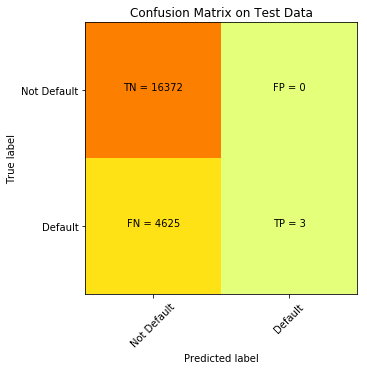

In [30]:
# You have another way to plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) # 2-by-2 matrix
labels = ['Not Default','Default'] # 1=Default, 0=Not Default
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(labels)) # [0, 1]
plt.xticks(tick_marks, labels, rotation=45) # marks in the x-axis
plt.yticks(tick_marks, labels) # marks in the y-axis
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment="center") # Add values in each cell
plt.show()

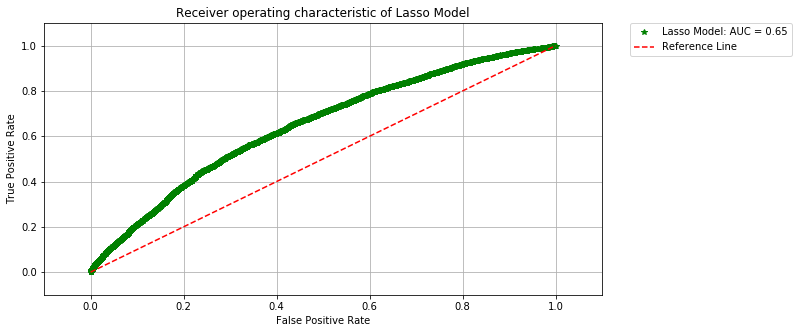

In [31]:
# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
scores = lasso_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

# ROC and AUC of test data
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(fpr, tpr, 'g*', label='Lasso Model: AUC = %0.2f'% roc_auc)
plt.plot([0,1], [0,1], 'r--', label='Reference Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic of Lasso Model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div class="alert alert-warning">
<b>Step 3.4: How does model performance change with hyperparameter?</b> 
</div>

In [32]:
# Import plotly package
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
py.offline.init_notebook_mode(connected=True)
#plt.figure(figsize=(10, 5))

In [33]:
# How does performance metrics change with lambda value?
def update_plot(a):
    
    lasso = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear', C=1/a, random_state=12345)
    lasso_model = lasso.fit(X=X_train, y=y_train)
    y_pred = lasso_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    scores = lasso_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, scores) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc = auc(fpr, tpr)
    
    layout = go.Layout(
        title = 'Receiver operating characteristic (ROC) of Lasso model',
        autosize=False,
        width=900,
        height=500,
        xaxis = {
            'title': 'False Positive Rate',
            'range': [0, 1.2]
        },
        yaxis = {
            'title': 'True Positive Rate',
            'range': [0, 1.2]
        }
    )

    trace_reference = go.Scatter(
        x = [0, 1],
        y = [0, 1],
        mode = 'lines',
        name = 'Reference Line',
        line = {
            'shape': 'spline',
            'dash': 'dashdot',
            'color': 'red',
            'width': 2
        }    
    )
    
    trace_roc = go.Scatter(
        x = fpr,
        y = tpr,
        mode = 'lines',
        name = 'Accuracy=%0.4f, Sensitivity=%0.4f, Precision=%0.4f, AUC=%0.4f' %(accuracy, sensitivity, precision, roc_auc),
        line = {
            'shape': 'spline'
        }
    )  

    fig = go.Figure(data=[trace_roc, trace_reference], layout=layout)
    py.offline.iplot(fig)    

In [34]:
lambdas = widgets.FloatLogSlider(
    value = 1,
    base = 10,
    min = -9, # max exponent of base
    max = 9, # min exponent of base
    step = 0.1, # exponent step
    description = 'lambdas: '
)

print("Please click, drag and slide: \n")
widgets.interactive(update_plot, a=lambdas)

Please click, drag and slide: 



interactive(children=(FloatLogSlider(value=1.0, description='lambdas: ', max=9.0, min=-9.0), Output()), _dom_c…

<a id="4"></a>

## 4 Decision Tree and Ensemble Learning

In [35]:
# Import libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [36]:
# Train-test split: 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(y_train.sum()/y_train.count(),y_test.sum()/y_test.count())

0.2225238095238095 0.21811111111111112


### 4.1 Bias-Variance Tradeoff

\begin{align}
E[(y-\hat{f}(x))^2] &= (E[\hat{f}(x)-f(x)])^2 + E[\hat{f}(x)-E[\hat{f}(x)]]^2 + \sigma^2  \\
&= \text{Bias}[\hat{f}(x)]^2 + \text{Var}[\hat{f}(x)] + \text{Irreducibel Error}
\end{align}

A figure to illustrate **Bias** and **Variance**:
<img src="https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg" width="400">

A chart to understand the tradeoff of **Bias** and **Variance**:
<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" width="500">

An example to show **Overfit** problem: <br/>
Which fitted line is more preferred? Black or Green?
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/320px-Overfitting.svg.png" width="300">

### 4.2 Decision Tree

<div class="alert alert-warning">
<b>Step 4.1: Create a simple decision tree model.</b>
<p>Please fit training data with <b>Classification Tree</b> model.</p>
<p>Please report/print test accuracy on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Classification Tree</a>
</div>
</div>

In [37]:
# Fit the model on train data: With early-stopping conditions
dtree = DecisionTreeClassifier(criterion='entropy', # Entropy and information gain for recursive binary split
                                max_depth=7, # Stopping condition: maximum tree depth
                                min_samples_split=5, # Stopping condition: Minimum number of samples required to split an internal node
                                min_samples_leaf=2, # Stopping condition: Minimum number of samples required to be at a leaf node
                                max_leaf_nodes=50, # Stopping condition: If None then unlimited number of leaf nodes
                                min_impurity_decrease=0, # Stopping condition: A node will be split if this split induces a decrease of the impurity greater than or equal to this value
                                random_state=12345 # Set seed to 12345 so that results can be replicated
                                )
dtree_model = dtree.fit(X_train, y_train)
dtree_model.classes_

array([0, 1], dtype=int64)

In [38]:
# Get predicted labels for test data
y_pred_tree = dtree_model.predict(X_test)

# Performance of model on test data
cm = confusion_matrix(y_test, y_pred_tree)
tn, fp, fn, tp = cm.ravel()

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
scores_tree = dtree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, scores_tree) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc_tree = auc(fpr_tree, tpr_tree)

print("Test Accuracy of Classificatioin Tree Model: ", accuracy_score(y_test, y_pred_tree))
print("Test Error of Classificatioin Tree Model: ", 1 - accuracy_score(y_test, y_pred_tree))
print("Confusion matrix of Classificatioin Tree Model:\n", cm)
print("Sensitivity (True positive rate, or Recall) of Classificatioin Tree Model: ", recall_score(y_test, y_pred_tree))
print("Precision (Positive predictive value) of Classificatioin Tree Model: ", precision_score(y_test, y_pred_tree))

Test Accuracy of Classificatioin Tree Model:  0.7806666666666666
Test Error of Classificatioin Tree Model:  0.21933333333333338
Confusion matrix of Classificatioin Tree Model:
 [[6834  203]
 [1771  192]]
Sensitivity (True positive rate, or Recall) of Classificatioin Tree Model:  0.097809475292919
Precision (Positive predictive value) of Classificatioin Tree Model:  0.4860759493670886


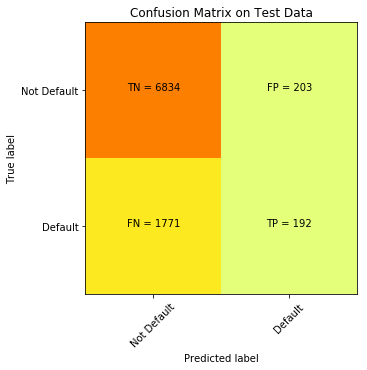

In [39]:
# You have another way to plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) # 2-by-2 matrix
labels = ['Not Default','Default'] # 1=Default, 0=Not Default
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(labels)) # [0, 1]
plt.xticks(tick_marks, labels, rotation=45) # marks in the x-axis
plt.yticks(tick_marks, labels) # marks in the y-axis
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment="center") # Add values in each cell
plt.show()

<div class="alert alert-danger">
<p>You can see that performance of a single decision tree model on the test data is very poor.</p>
</div>

<div class="alert alert-warning">
<b>Step 4.2: Visualize the structure of this decision tree.</b>
<p>You may need to install <code><b>graphviz</b></code> and <code><b>python-graphviz</b></code> packages in the anaconda first.</p>
</div>

In [40]:
import graphviz

plot_tree = tree.export_graphviz(dtree_model, out_file=None, feature_names=X.columns, class_names=output, filled=True, rounded=True, special_characters=True)  
tree_graph = graphviz.Source(plot_tree)

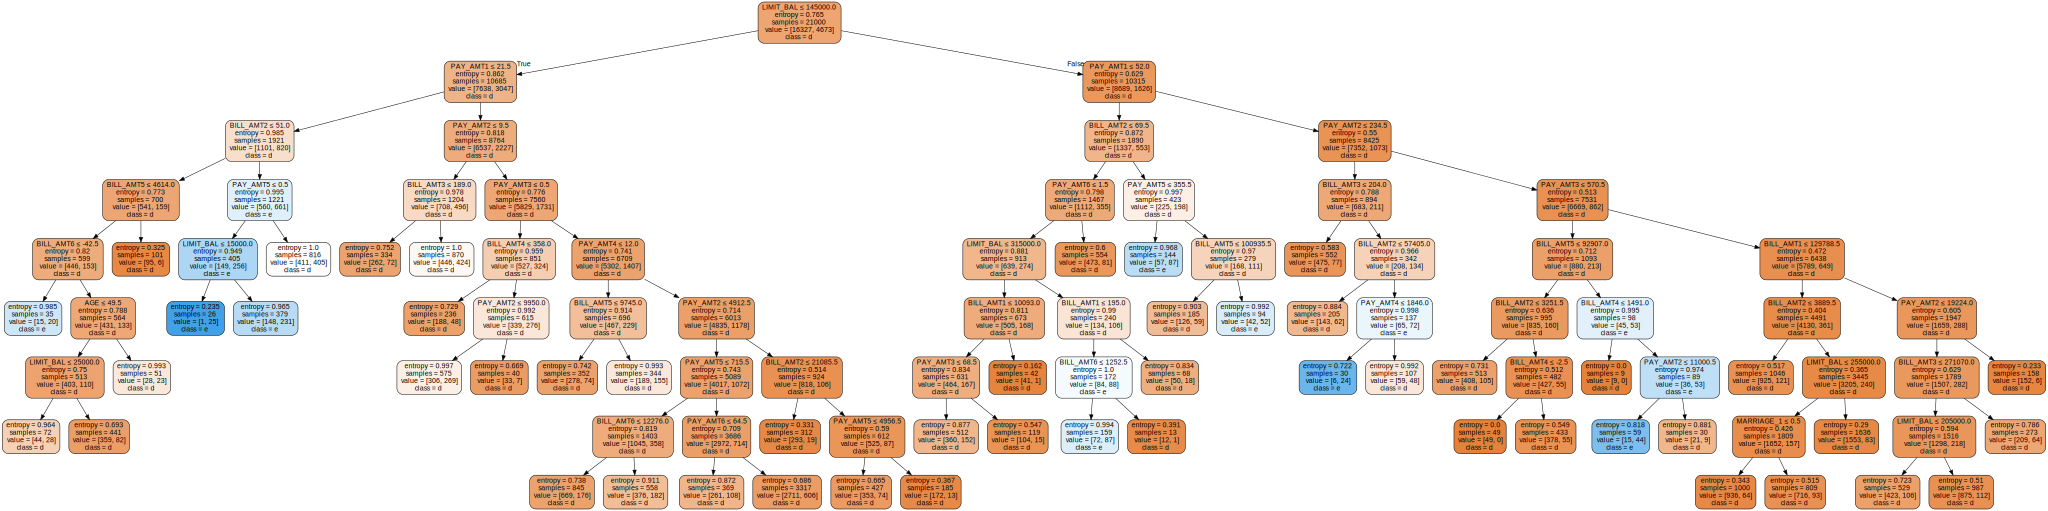

In [41]:
# Visualize the structure of this decision tree in the notebook
tree_graph

### 4.3 Bagging

A basic procedure for **Bagging** is:

<img src="https://www.safaribooksonline.com/library/view/python-deeper-insights/9781787128576/graphics/3547_07_06.jpg" width="500">

<div class="alert alert-warning">
<b>Step 4.3: Create a bagging model.</b>
<p>Please fit training data with <b>Bagging model</b>, which composed of <code><b>20</b></code> base models.</p>
<p>Please report/print test accuracy scores of this bagging model on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>n_estimators=20</b></code> and <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Bagging</a>
</div>
</div>

In [42]:
# Number of base learners
N = 100

# Bagging model
Bag = BaggingClassifier(n_estimators=N, random_state=12345)
Bag_model = Bag.fit(X_train, y_train)
Bag_model.classes_

array([0, 1], dtype=int64)

In [43]:
# Get predicted labels for test data
y_pred_Bag = Bag_model.predict(X_test)

# Performance of model on test data
cm = confusion_matrix(y_test, y_pred_Bag)
tn, fp, fn, tp = cm.ravel()

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
scores_Bag = Bag_model.predict_proba(X_test)[:, 1]
fpr_Bag, tpr_Bag, thresholds_Bag = roc_curve(y_test, scores_Bag) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc_Bag = auc(fpr_Bag, tpr_Bag)

print("Test Accuracy of Bagging Model: ", accuracy_score(y_test, y_pred_Bag))
print("Test Error of Bagging Model: ", 1 - accuracy_score(y_test, y_pred_Bag))
print("Confusion matrix of Bagging Model:\n", cm)
print("Sensitivity (True positive rate, or Recall) of Bagging Model: ", recall_score(y_test, y_pred_Bag))
print("Precision (Positive predictive value) of Bagging Model: ", precision_score(y_test, y_pred_Bag))

Test Accuracy of Bagging Model:  0.7874444444444444
Test Error of Bagging Model:  0.2125555555555556
Confusion matrix of Bagging Model:
 [[6633  404]
 [1509  454]]
Sensitivity (True positive rate, or Recall) of Bagging Model:  0.2312786551197147
Precision (Positive predictive value) of Bagging Model:  0.5291375291375291


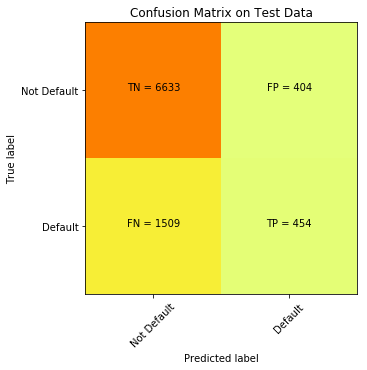

In [44]:
# You have another way to plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) # 2-by-2 matrix
labels = ['Not Default','Default'] # 1=Default, 0=Not Default
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(labels)) # [0, 1]
plt.xticks(tick_marks, labels, rotation=45) # marks in the x-axis
plt.yticks(tick_marks, labels) # marks in the y-axis
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment="center") # Add values in each cell
plt.show()

<div class="alert alert-danger">
<p>Bagging model outperforms the single decision tree model in terms of most of performance metrics on the test data.</p>
</div>

### 4.4 Random Forest

A basic procedure for **Random Forest** is:

<img src="https://i.ytimg.com/vi/ajTc5y3OqSQ/hqdefault.jpg" width="500">

<div class="alert alert-warning">
<b>Step 4.4: Create a random forest model.</b>
<p>Please fit training data with <b>Random Forest</b> model, which composed of <code><b>20</b></code> base models.</p>
<p>Please report/print test accuracy scores of this random forest model on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>n_estimators=20</b></code> and <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">Random Forest</a>
</div>
</div>

In [45]:
# Random Forest model
RF = RandomForestClassifier(n_estimators=N, random_state=12345)
RF_model = RF.fit(X_train, y_train)
RF_model.classes_

array([0, 1], dtype=int64)

In [46]:
# Get predicted labels for test data
y_pred_RF = RF_model.predict(X_test)

# Performance of model on test data
cm = confusion_matrix(y_test, y_pred_RF)
tn, fp, fn, tp = cm.ravel()

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
scores_RF = RF_model.predict_proba(X_test)[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, scores_RF) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc_RF = auc(fpr_RF, tpr_RF)

print("Test Accuracy of Random Forest Model: ", accuracy_score(y_test, y_pred_RF))
print("Test Error of Random Forest Model: ", 1 - accuracy_score(y_test, y_pred_RF))
print("Confusion matrix of Random Forest Model:\n", cm)
print("Sensitivity (True positive rate, or Recall) of Random Forest Model: ", recall_score(y_test, y_pred_RF))
print("Precision (Positive predictive value) of Random Forest Model: ", precision_score(y_test, y_pred_RF))

Test Accuracy of Random Forest Model:  0.7906666666666666
Test Error of Random Forest Model:  0.20933333333333337
Confusion matrix of Random Forest Model:
 [[6742  295]
 [1589  374]]
Sensitivity (True positive rate, or Recall) of Random Forest Model:  0.19052470708099847
Precision (Positive predictive value) of Random Forest Model:  0.5590433482810164


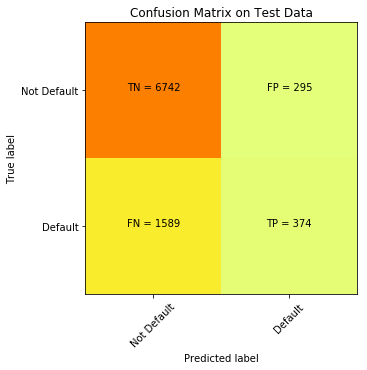

In [47]:
# You have another way to plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) # 2-by-2 matrix
labels = ['Not Default','Default'] # 1=Default, 0=Not Default
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(labels)) # [0, 1]
plt.xticks(tick_marks, labels, rotation=45) # marks in the x-axis
plt.yticks(tick_marks, labels) # marks in the y-axis
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment="center") # Add values in each cell
plt.show()

<div class="alert alert-danger">
<p>Random Forest model also outperforms a single decision tree model in terms of most of performance metrics on the test data.</p>
</div>

### 4.5 Gradient Boost

A typical procedure for boosting method is:

<img src="https://koalaverse.github.io/machine-learning-in-R/images/boosting_diagram.png" width="500">

The algorithm for **GradientBoost** is:

<img src="https://i.stack.imgur.com/ik70N.png" width="500">

<div class="alert alert-warning">
<b>Step 4.5: Create a GradientBoost model.</b>
<p>Please fit training data with <b>GradientBoost</b> model, which composed of <code><b>20</b></code> base models.</p>
<p>Please report/print test accuracy scores of this GradientBoost model on the <code><b>test</b></code> dataset.</p>
<p><b>Remember: </b>Set <code><b>n_estimators=20</b></code> and <code><b>random_state=12345</b></code> so that results can be replicated.</p> 
<p>You can refer to: </p>
<div class="btn-group">    
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html" target="_blank" class="btn btn-primary" role="button" style="text-decoration: none">GradientBoost</a>
</div>
</div>

In [48]:
GDB = GradientBoostingClassifier(n_estimators=N, random_state=12345)
GDB_model = GDB.fit(X_train, y_train)
GDB_model.classes_

array([0, 1], dtype=int64)

In [49]:
# Get predicted labels for test data
y_pred_GDB = GDB_model.predict(X_test)

# Performance of model on test data
cm = confusion_matrix(y_test, y_pred_GDB)
tn, fp, fn, tp = cm.ravel()

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
scores_GDB = GDB_model.predict_proba(X_test)[:, 1]
fpr_GDB, tpr_GDB, thresholds_GDB = roc_curve(y_test, scores_GDB) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc_GDB = auc(fpr_GDB, tpr_GDB)

print("Test Accuracy of GradientBoost Model: ", accuracy_score(y_test, y_pred_GDB))
print("Test Error of GradientBoost Model: ", 1 - accuracy_score(y_test, y_pred_GDB))
print("Confusion matrix of GradientBoost Model:\n", cm)
print("Sensitivity (True positive rate, or Recall) of GradientBoost Model: ", recall_score(y_test, y_pred_GDB))
print("Precision (Positive predictive value) of GradientBoost Model: ", precision_score(y_test, y_pred_GDB))

Test Accuracy of GradientBoost Model:  0.7925555555555556
Test Error of GradientBoost Model:  0.20744444444444443
Confusion matrix of GradientBoost Model:
 [[6809  228]
 [1639  324]]
Sensitivity (True positive rate, or Recall) of GradientBoost Model:  0.16505348955680083
Precision (Positive predictive value) of GradientBoost Model:  0.5869565217391305


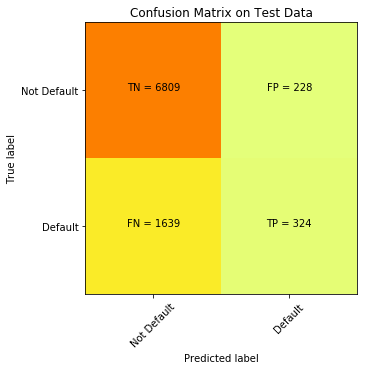

In [50]:
# You have another way to plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) # 2-by-2 matrix
labels = ['Not Default','Default'] # 1=Default, 0=Not Default
plt.title('Confusion Matrix on Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(labels)) # [0, 1]
plt.xticks(tick_marks, labels, rotation=45) # marks in the x-axis
plt.yticks(tick_marks, labels) # marks in the y-axis
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment="center") # Add values in each cell
plt.show()

<div class="alert alert-danger">
<p>Compared the single decision tree model, GradientBoost model also significantly improves most of performance metrics on the test data.</p>
</div>

<div class="alert alert-warning">
<b>Step 4.6: ROC and AUC of single tree model and ensemble learning models.</b>
</div>

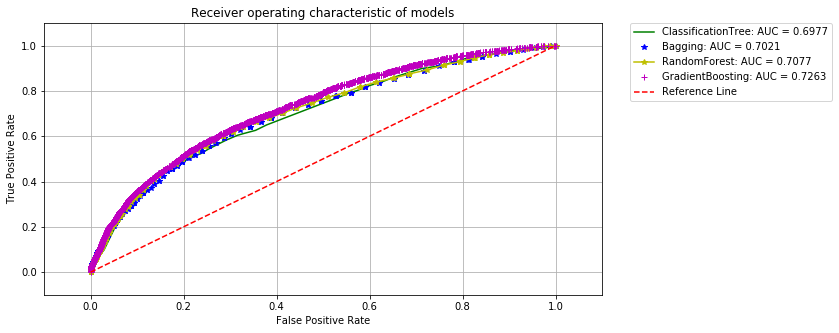

In [51]:
# ROC and AUC of test data
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(fpr_tree, tpr_tree, 'g-', label='ClassificationTree: AUC = %0.4f'% roc_auc_tree)
plt.plot(fpr_Bag, tpr_Bag, 'b*', label='Bagging: AUC = %0.4f'% roc_auc_Bag)
plt.plot(fpr_RF, tpr_RF, 'y*-', label='RandomForest: AUC = %0.4f'% roc_auc_RF)
plt.plot(fpr_GDB, tpr_GDB, 'm+', label='GradientBoosting: AUC = %0.4f'% roc_auc_GDB)
plt.plot([0,1], [0,1], 'r--', label='Reference Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic of models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div class="alert alert-danger">
<p>AUC of a single decision tree is lower than AUC of ensemble learning methods.</p>
</div>

<a id="5"></a>